# Imports and Setup

In [1]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

# Business Understanding

- Goal: Understand which features drive Medicare payments and build a model to predict Avg_Mdcr_Pymt_Amt. Share insights with visuals & a scenario.

# Data Loading

In [5]:
file_path = "/Users/jiyoon/Desktop/medicare_physician_datasets.csv"

# Load only the first 50,000 rows to handle large file size efficiently
df = pd.read_csv(file_path, nrows=50000)

print("Data Shape", df.shape)
df.head(3)

Data Shape (50000, 28)


/var/folders/cg/3l7zwjtx4kx5vrx5x2r20btm0000gn/T/ipykernel_3175/830310390.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, nrows=50000)


,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,MD,...,Initial hospital care with straightforward or ...,N,F,12,12.0,12,250.226667,89.062500,60.312500,54.669167
1,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,MD,...,Initial hospital care with straightforward or ...,N,F,22,22.0,22,318.581818,130.312727,99.380000,98.429545
2,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,MD,...,Subsequent hospital care with straightforward ...,N,F,76,127.0,127,95.732283,54.820157,43.557323,38.748661


# Data Understanding

In [7]:
# Basic info: dtypes, non-null counts
print("\n--- Data Info ---")
df.info()

# Basic statistics for numeric columns
print("\n--- Descriptive Statistics ---")
display(df.describe().T)

# Missing values overview
print("\n--- Missing values ---")
display(df.isnull().sum().sort_values(ascending=False))


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rndrng_NPI                     50000 non-null  int64  
 1   Rndrng_Prvdr_Last_Org_Name     50000 non-null  object 
 2   Rndrng_Prvdr_First_Name        48224 non-null  object 
 3   Rndrng_Prvdr_MI                29685 non-null  object 
 4   Rndrng_Prvdr_Crdntls           43949 non-null  object 
 5   Rndrng_Prvdr_Ent_Cd            50000 non-null  object 
 6   Rndrng_Prvdr_St1               50000 non-null  object 
 7   Rndrng_Prvdr_St2               8740 non-null   object 
 8   Rndrng_Prvdr_City              50000 non-null  object 
 9   Rndrng_Prvdr_State_Abrvtn      50000 non-null  object 
 10  Rndrng_Prvdr_State_FIPS        50000 non-null  object 
 11  Rndrng_Prvdr_Zip5              50000 non-null  int64  
 12  Rndrng_Prvdr_RUCA          

,count,mean,std,min,25%,50%,75%,max
Rndrng_NPI,50000.0,1.003201e+09,137500.796770,1.003000e+09,1.003079e+09,1.003184e+09,1.003297e+09,1.003539e+09
Rndrng_Prvdr_Zip5,50000.0,4.866390e+04,29052.011108,7.160000e+02,2.401400e+04,4.487000e+04,7.539000e+04,9.980100e+04
Rndrng_Prvdr_RUCA,49979.0,1.528416e+00,3.597134,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
Tot_Benes,50000.0,6.739318e+01,287.331339,1.100000e+01,1.700000e+01,3.000000e+01,6.500000e+01,4.516900e+04
Tot_Srvcs,50000.0,2.064226e+02,3913.507118,1.100000e+01,2.000000e+01,4.000000e+01,1.040000e+02,8.139680e+05
Tot_Bene_Day_Srvcs,50000.0,1.094510e+02,589.128781,1.100000e+01,1.900000e+01,3.800000e+01,9.400000e+01,1.017460e+05
Avg_Sbmtd_Chrg,50000.0,4.376818e+02,1555.911803,1.000000e-02,8.000000e+01,1.910000e+02,3.800000e+02,9.999999e+04
Avg_Mdcr_Alowd_Amt,50000.0,1.065601e+02,323.525173,1.000000e-02,2.871074e+01,7.432926e+01,1.222340e+02,2.405600e+04
Avg_Mdcr_Pymt_Amt,50000.0,8.316463e+01,258.337826,0.000000e+00,2.217766e+01,5.603599e+01,9.303643e+01,1.928284e+04
Avg_Mdcr_Stdzd_Amt,50000.0,8.253171e+01,259.800175,0.000000e+00,2.064972e+01,5.668332e+01,9.324255e+01,1.952001e+04



--- Missing values ---


Rndrng_Prvdr_St2                 41260
Rndrng_Prvdr_MI                  20315
Rndrng_Prvdr_Crdntls              6051
Rndrng_Prvdr_First_Name           1776
Rndrng_Prvdr_RUCA_Desc              21
Rndrng_Prvdr_RUCA                   21
Rndrng_NPI                           0
Tot_Benes                            0
HCPCS_Drug_Ind                       0
Place_Of_Srvc                        0
Avg_Sbmtd_Chrg                       0
Tot_Srvcs                            0
Tot_Bene_Day_Srvcs                   0
HCPCS_Cd                             0
Avg_Mdcr_Alowd_Amt                   0
Avg_Mdcr_Pymt_Amt                    0
HCPCS_Desc                           0
Rndrng_Prvdr_Cntry                   0
Rndrng_Prvdr_Mdcr_Prtcptg_Ind        0
Rndrng_Prvdr_Type                    0
Rndrng_Prvdr_Last_Org_Name           0
Rndrng_Prvdr_Zip5                    0
Rndrng_Prvdr_State_FIPS              0
Rndrng_Prvdr_State_Abrvtn            0
Rndrng_Prvdr_City                    0
Rndrng_Prvdr_St1         

# Exploratory Data Analysis (EDA)

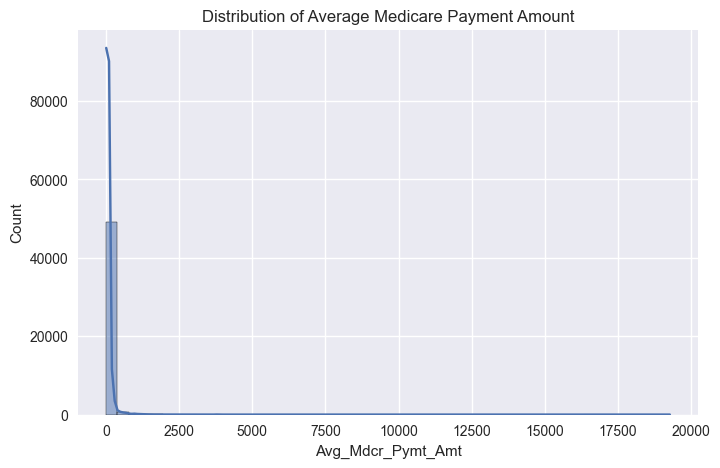

In [9]:
# Choose target variable
target = "Avg_Mdcr_Pymt_Amt"

# target distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[target].dropna(), bins=50, kde=True)
plt.title("Distribution of Average Medicare Payment Amount")
plt.xlabel(target)
plt.ylabel("Count")
plt.show()

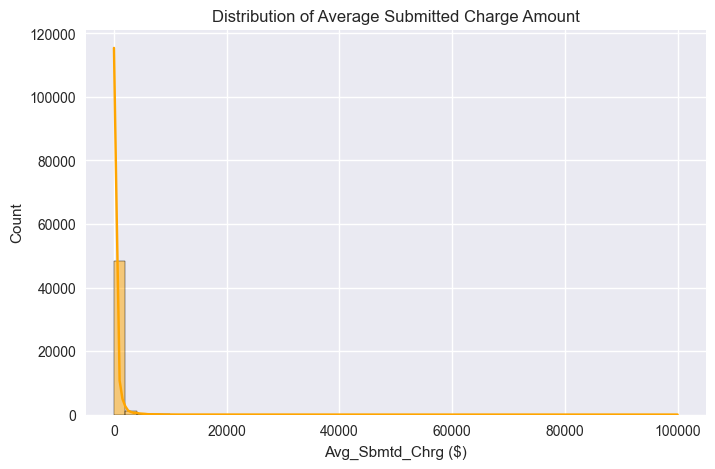

In [11]:
# Plot distribution of average submitted charge amount
plt.figure(figsize=(8, 5))
sns.histplot(df["Avg_Sbmtd_Chrg"].dropna(), bins=50, kde=True, color='orange')
plt.title("Distribution of Average Submitted Charge Amount")
plt.xlabel("Avg_Sbmtd_Chrg ($)")
plt.ylabel("Count")
plt.show()

### Q1) Do payments differ by place of service (F vs O)?

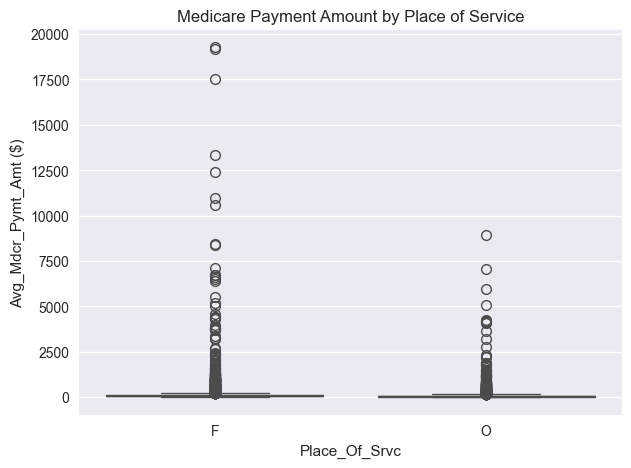

In [13]:
# Boxplot by place of service
plt.figure(figsize=(7, 5))
sns.boxplot(x='Place_Of_Srvc', y=target, data=df)
plt.title("Medicare Payment Amount by Place of Service")
plt.xlabel("Place_Of_Srvc")
plt.ylabel(f"{target} ($)")
plt.show()

- Both F and O show long right tails (few very high claims).
- Medians are relatively low. distribution is skewed.

### Q2) Who dominates by volume? (Top 10 provider types by count)

/var/folders/cg/3l7zwjtx4kx5vrx5x2r20btm0000gn/T/ipykernel_3175/716726678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provider_types.values, y=top_provider_types.index, palette="Set2")


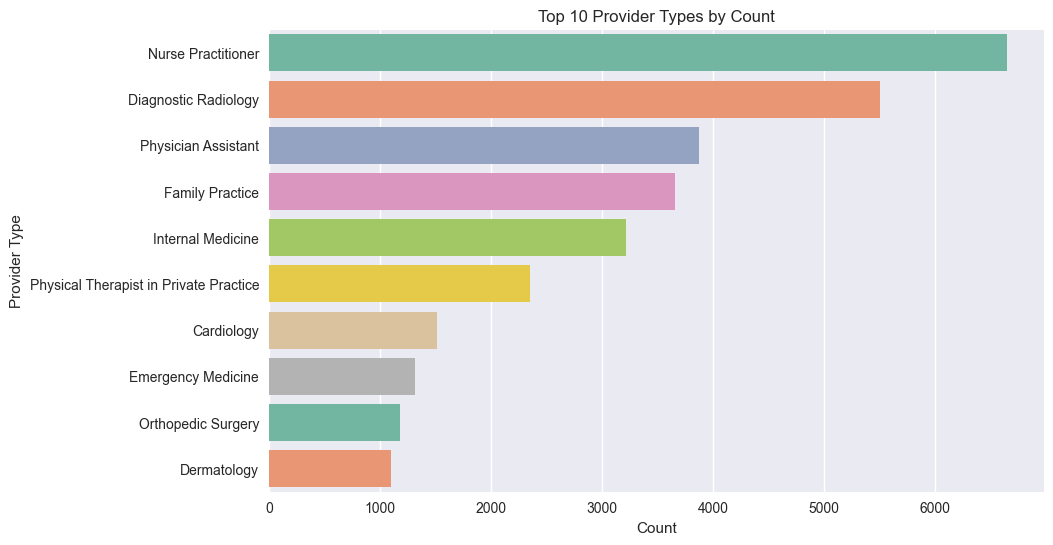

In [15]:
# Top provider types
top_provider_types = df["Rndrng_Prvdr_Type"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_provider_types.values, y=top_provider_types.index, palette="Set2")
plt.title("Top 10 Provider Types by Count")
plt.xlabel("Count")
plt.ylabel("Provider Type")
plt.show()

- Nurse Practitioner and Diagnostic Radiology lead by volume in this sample.

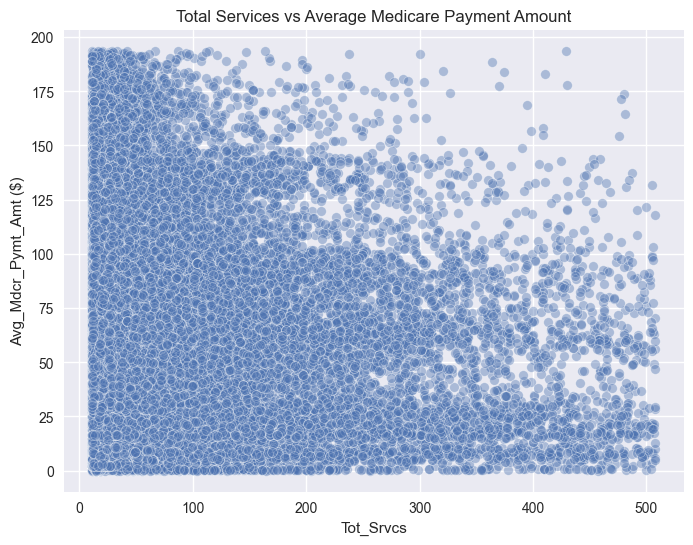

In [17]:
# Scatter: Tot_Srvcs vs Payment (clip extremes for readability)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Tot_Srvcs',
    y=target,
    data=df[(df['Tot_Srvcs'] <= df['Tot_Srvcs'].quantile(0.95)) & 
            (df[target] <= df[target].quantile(0.95))],
    alpha=0.4
)
plt.title("Total Services vs Average Medicare Payment Amount")
plt.xlabel("Tot_Srvcs")
plt.ylabel(f"{target} ($)")
plt.show()

### Q3) How do charges, payments, and utilization move together?

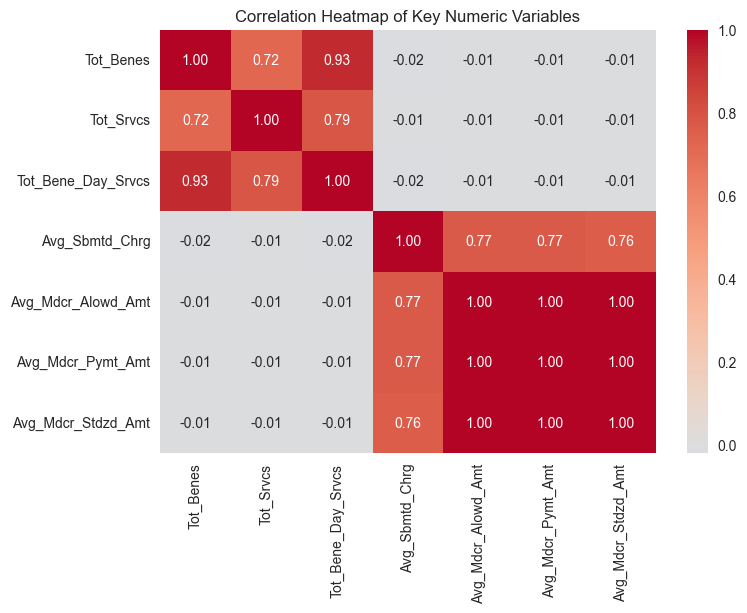

In [21]:
# # Correlation heatmap of key numeric columns

key_numeric = [
    'Tot_Benes','Tot_Srvcs','Tot_Bene_Day_Srvcs',
    'Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt',target,'Avg_Mdcr_Stdzd_Amt'
]
corr = df[key_numeric].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Key Numeric Variables")
plt.show()

- Avg_Sbmtd_Chrg aligns strongly with Avg_Mdcr_Pymt_Amt (~0.77 in sample).
- Allowed/Standardized amounts move almost in lock-step with Payment.
- Leakage note: Allowed/Standardized are claim-derived; exclude from features.

### Q4) Which provider types tend to have higher payments?

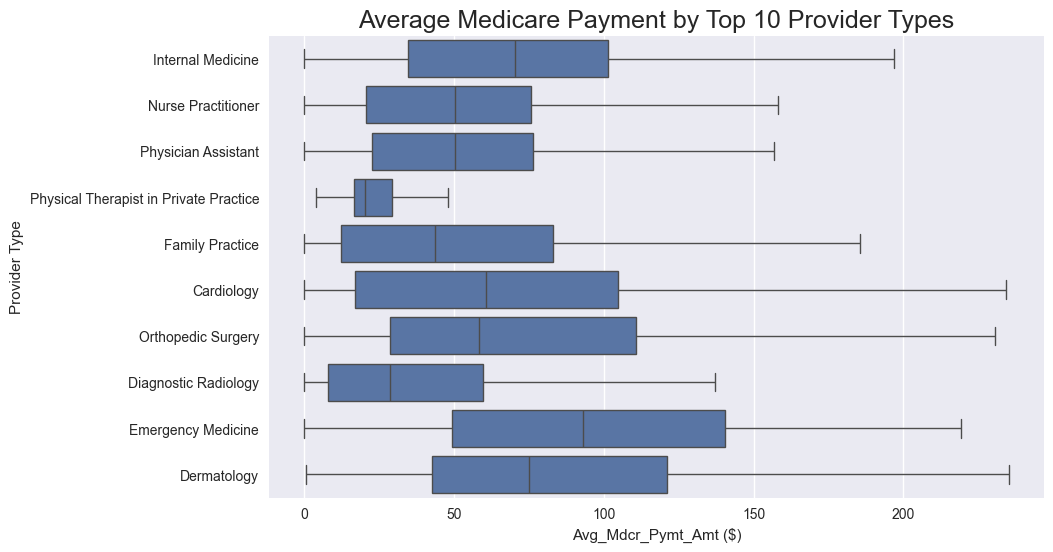

In [27]:
# Boxplot of payment by top provider types

top10_types = df['Rndrng_Prvdr_Type'].value_counts().head(10).index
df_top10 = df[df['Rndrng_Prvdr_Type'].isin(top10_types)]
plt.figure(figsize=(10, 6))

sns.boxplot(x=target, y='Rndrng_Prvdr_Type', data=df_top10, showfliers=False)
plt.title("Average Medicare Payment by Top 10 Provider Types", size=18)
plt.xlabel(f"{target} ($)")
plt.ylabel("Provider Type")
plt.show()

- Some specialties show higher medians and wider spread.

### Q5) Does urban-rural context relate to payments?

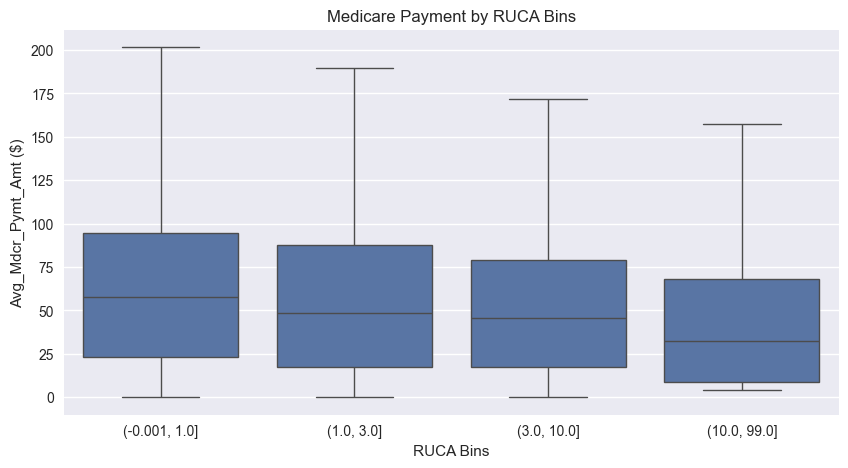

In [29]:
# Box plot of RUCA vs payment

plt.figure(figsize=(10, 5))
sns.boxplot(
    x=pd.cut(df['Rndrng_Prvdr_RUCA'], bins=[0,1,3,10,99], include_lowest=True),
    y=target,
    data=df,
    showfliers=False
)

plt.title("Medicare Payment by RUCA Bins")
plt.xlabel("RUCA Bins")
plt.ylabel(f"{target} ($)")
plt.show()

- More rural bins tend to show lower medians; variability is large.

# Data Preparation

In [31]:
# Select modeling features based on EDA signal & availability
selected_features = ['Tot_Srvcs', 'Tot_Benes', 'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Rndrng_Prvdr_Type', 'Place_Of_Srvc']

# Build modeling frame and drop rows with missing values in selected fields
df_model = df[selected_features + [target]].dropna()
print("Modeling dataset shape:", df_model.shape)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['Rndrng_Prvdr_Type','Place_Of_Srvc'], drop_first=True)
print("Encoded dataset shape:", df_encoded.shape)

Modeling dataset shape: (50000, 7)
Encoded dataset shape: (50000, 94)


# Train / Test split

In [33]:
# split data into train and test
X = df_encoded.drop(columns=[target])
y = df_encoded[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (40000, 93)  Test shape: (10000, 93)


# Modeling: Linear Regression & Random Forest

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation

In [45]:
# Evaluation helper
def evaluate_model(name, y_true, y_pred):
    """
    Regression evaluator

    Args:
        name (str): Model name.
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name:<18} | MAE: {mae:,.2f} | RMSE: {rmse:,.2f} | R²: {r2:.4f}")

print("\n=== Model Performance ===")
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


=== Model Performance ===
Linear Regression  | MAE: 38.66 | RMSE: 110.81 | R²: 0.5846
Random Forest      | MAE: 28.19 | RMSE: 123.98 | R²: 0.4800


# Feature Importance
- Random Forest + Heatmap for modeling vars

/var/folders/cg/3l7zwjtx4kx5vrx5x2r20btm0000gn/T/ipykernel_3175/1947462006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")


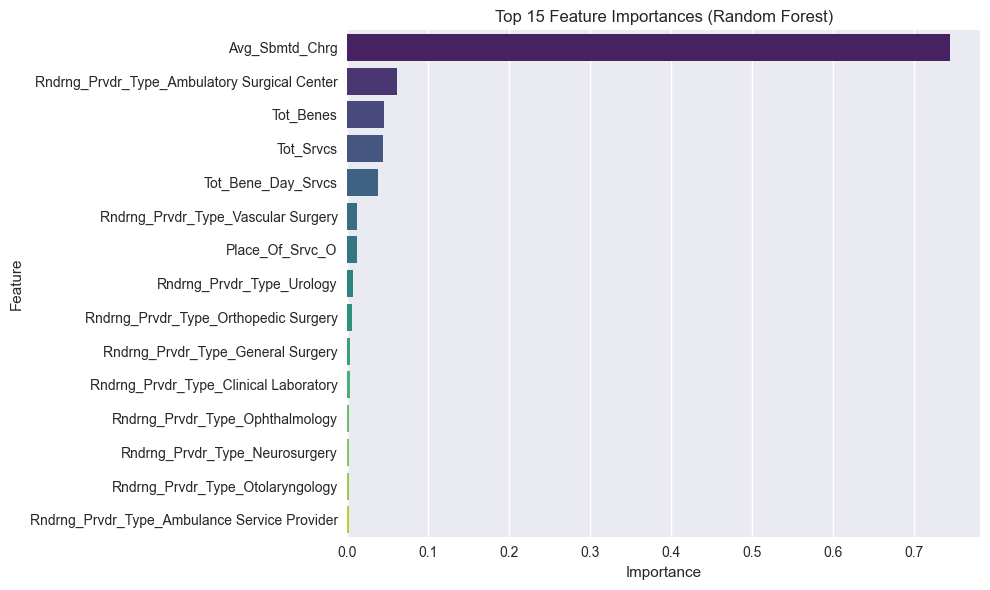

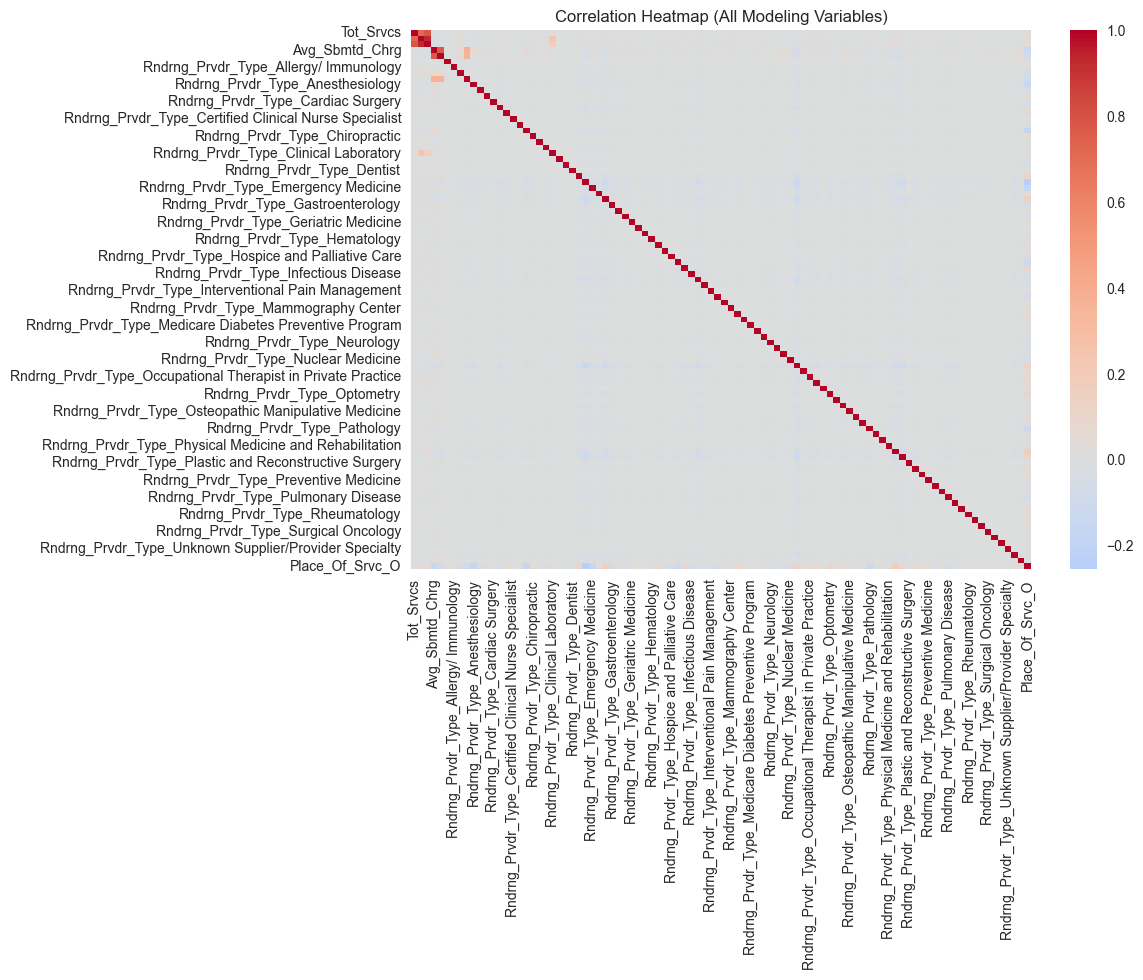

In [39]:
# Convert feature importances to a sorted Series for easy plotting/inspection

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Correlation heatmap (encoded modeling frame)
plt.figure(figsize=(10, 7))
corr_model = df_encoded.corr()
sns.heatmap(corr_model, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (All Modeling Variables)")
plt.show()

# Creative Prediction Scenario

In [54]:
scenario = pd.DataFrame([np.zeros(X.shape[1])], columns=X.columns)

# Numeric drivers in one shot using column intersection (no if)
num_values = {
    'Tot_Srvcs': 500,
    'Tot_Benes': 120,
    'Tot_Bene_Day_Srvcs': 200,
    'Avg_Sbmtd_Chrg': 1500
}
num_cols = pd.Index(num_values.keys()).intersection(X.columns)
scenario.loc[0, num_cols] = [num_values[c] for c in num_cols]

# Choose one provider-type dummy and one place-of-service dummy

desired_provider = "Internal Medicine" 
desired_place    = "F"                 

# Provider dummies
prov_cols = pd.Index(X.columns)[pd.Index(X.columns).str.startswith("Rndrng_Prvdr_Type_")]

# Reset all provider dummies to 0
scenario.loc[0, prov_cols] = 0

# Try to select the exact desired provider dummy
prov_target = prov_cols[prov_cols.str.endswith(f"_{desired_provider}")]
prov_choice = pd.Index(list(prov_target[:1]) + list(prov_cols[:1]))[:1]
scenario.loc[0, prov_choice] = 1 

# Place-of-service dummies (columns start with 'Place_Of_Srvc_')
place_cols = pd.Index(X.columns)[pd.Index(X.columns).str.startswith("Place_Of_Srvc_")]

# Reset all place dummies to 0
scenario.loc[0, place_cols] = 0

# Try to select the exact desired place dummy
place_target = place_cols[place_cols.str.endswith(f"_{desired_place}")]
place_choice = pd.Index(list(place_target[:1]) + list(place_cols[:1]))[:1]
scenario.loc[0, place_choice] = 1

# Predict with the trained models
pred_payment_rf = rf.predict(scenario)[0]
print("\n=== Creative Scenario Prediction ===")
print("Non-zero inputs in scenario:")

display(scenario.loc[:, (scenario != 0).any(axis=0)])
print(f"[Random Forest] Predicted Avg Medicare Payment Amount: ${pred_payment_rf:,.2f}")

pred_payment_lr = lr.predict(scenario)[0]
print(f"[Linear Regression] Predicted Avg Medicare Payment Amount: ${pred_payment_lr:,.2f}")


=== Creative Scenario Prediction ===
Non-zero inputs in scenario:


,Tot_Srvcs,Tot_Benes,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Rndrng_Prvdr_Type_Internal Medicine,Place_Of_Srvc_O
0,500.0,120.0,200.0,1500.0,1.0,1.0


[Random Forest] Predicted Avg Medicare Payment Amount: $463.19
[Linear Regression] Predicted Avg Medicare Payment Amount: $240.71
